<a href="https://colab.research.google.com/github/soumyanamboo/Machine-Learning-Techniques/blob/main/Week2_Practises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectives:
*   To Demonstrate training data and model components of linear regression model.
*   Demonstrate how simple is it to implement ML components and algorithams

# Import Libraries

In [ ]:
from IPython.display import display, Math, Latex

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

*   Training Data - features and label that are real number
*   Model : **y** = **Xw**

# 1.   **Training Data**

In [ ]:
# Create a dataset of 100 examples and a signle feature and a label. 
# We use the following parameters
def generate_data(n):
  w1 = 3
  w0 = 4
  #n = 100

  X = 10 * np.random.rand(n,)

  y = w0 + w1 * X + np.random.randn(n,)  # to add some random noice to the label value
  return(X, y)

X, y = generate_data(100)
#print('Training Data: ', X)
#print('Label: ', y)

In [ ]:
#Chacking the shape training data
print('Shape of feature matrix : ', X.shape)
print('Shape of label vector : ',y.shape)

Shape of feature matrix :  (100,)
Shape of label vector :  (100,)


In [ ]:
from sklearn.model_selection import train_test_split

def preprocess(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=42)
  X_train_with_dummy = add_dummy_feature(X_train)
  y_train_with_dummy = add_dummy_feature(y_train)

  X_test_with_dummy = add_dummy_feature(X_test)
  y_test_with_dummy = add_dummy_feature(y_test)

  return X_train_with_dummy, y_train, X_test_with_dummy, y_test

In [ ]:
#Divide the feature matrix into training data and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=42)

#Checking the sizes of test and training data

print('Shape of training data feature matrix : ', X_train.shape)
print('Shape of training label vector : ',y_train.shape)
print('Shape of test data feature matrix : ', X_test.shape)
print('Shape of test label vector : ',y_test.shape)

#Checking some sample data and labels
print(X_train[:5])
print(y_train[:5])

Shape of training data feature matrix :  (80,)
Shape of training label vector :  (80,)
Shape of test data feature matrix :  (20,)
Shape of test label vector :  (20,)
[8.85793784 3.85298471 1.46183891 7.60612052 3.02610229]
[31.28290222 15.9155734   9.86738685 25.94931106 14.49223087]


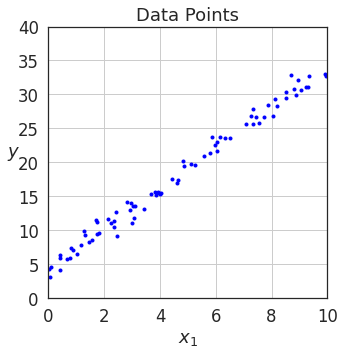

In [ ]:
#Visualize the training set

sns.set_style("white")
f = plt.figure(figsize=(5,5))
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth" : 2.5})

plt.plot(X_train, y_train,"b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,10,0,40])

plt.show()

Here training set contains only single feature. So we will fit a simple linear regression model with one feature.
It is of the form y = $w_0$ + $w_1$$x_1$.

We will add a special dummy feature $x_0$ and set it to 1. The below function is used for that.

In [ ]:
def add_dummy_feature(x):
  '''   Adds dummy feature to the dataset.

        Args:
          x : Training dataset
        
        Returns:
          Training dataset with addition of dummy feature.
  '''
  dummy_feature_matrix = np.column_stack((np.ones(x.shape[0]),x))
  return(dummy_feature_matrix)

#train_matrix = np.array([[3,2,5],[9,4,7]])
#train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)
#print(train_matrix_with_dummy_feature)

**Testing**

Let us take a testcase to test this function. 
For that we will take a 2 examples and 3 features.\
The first example is a feature vector, 

$x^{(1)}_{(3,1)} = \begin{pmatrix}3\\2\\5 \end{pmatrix}$

$x^{(2)}_{(3,1)} = \begin{pmatrix}9\\4\\7 \end{pmatrix}$

Feature Matrix X has shape (n,m) corresponding to features of all examples before adding the dummy feature $x_0$,\
$X_{(n,m)}$ = \begin{pmatrix}
            -(x^{(0)})^T- \\
            -(x^{(1)})^T-\\
            \cdots\\
            -(x^{(n)})^T-
        \end{pmatrix}


In this example, this becomes:

$X_{(2,3)}$ = \begin{pmatrix}
            -(x^{(0)})^T- \\
            -(x^{(1)})^T-
        \end{pmatrix}

i.e $X_{(2,3)}$ = \begin{pmatrix}
            3 & 2 & 5 \\
            9 & 4 & 7\\
        \end{pmatrix}
       
Once we add dummy feature, the resultant matrix becomes:  
$X_{(2,3)}$ = \begin{pmatrix}
              1 & 3 & 2 & 5 \\
              1 & 9 & 4 & 7\\
              \end{pmatrix}

In [ ]:
# Testing the add dummy feature

import unittest

class TestAddDummyFeature(unittest.TestCase):
  def test_add_dummy_feature(self):
    train_matrix = np.array([[3,2,5],[9,4,7]])
    train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)
    #print(train_matrix_with_dummy_feature)
    #checking the shape
    self.assertEqual(train_matrix_with_dummy_feature.shape,(2,4))

    #checking the contents 
    np.testing.assert_array_equal(train_matrix_with_dummy_feature,np.array([[1,3,2,5],[1,9,4,7]]))
  
unittest.main(argv=[''],defaultTest='TestAddDummyFeature',verbosity=2,exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [ ]:
add_dummy_feature(np.array([[3,2],[5,3]]))

array([[1., 3., 2.],
       [1., 5., 3.]])

In [ ]:
# Preprocess training dataset to add dummy feature

print('Before aadding dummy feature:\n',X_train[:5])
X_train_with_dummy = add_dummy_feature(X_train)
print('After aadding dummy feature:\n',X_train_with_dummy[:5])

Before aadding dummy feature:
 [4.63157346 0.02406536 0.42913943 0.42991364 2.35426865]
After aadding dummy feature:
 [[1.         4.63157346]
 [1.         0.02406536]
 [1.         0.42913943]
 [1.         0.42991364]
 [1.         2.35426865]]


# 2.   **Model**

Linear regression model uses linear combination of features to obtain output labels
*   Model is parameterized by its weight vector\
The general vectorized form is:  y$_{(n,1)} = X_{(n,m+1)}$w$_{(m+1),1}$  
where 

*   n is the number of examples
*   m is the number of features
*   X is a feature matrix with (m+1) features for n examples along rows.
*   w is a weight vector contaning (m+1) weights for each feature
*   y is a label vector containing label for n examples with shape (n,)






In [ ]:
def predict(X, w):
  ''' Prediction of output label for a given input

      Args:
        X: feature matrix of shape (n,m+1)
        w: weight vector of shape(m+1, 1)
      Returns:
        y: predicted label vector of shape (n,1)
  '''
  # checking feature matrix and weight vector have compatible shape
  assert X.shape[-1] == w.shape[0], "X and w dont have compatible dimensions"
  return X @ w

**Example:**  
X = [[1,3,2,5][1,9,4,7]]  
and w = [1 1 1 1] (column vector)  
predicted label y = Xw = [[1+3+2+5],[1+9+4+7]]  
                      = [11 21]  
We will test this example as follows:

```
# This is formatted as code
```



In [ ]:
class TestPredict(unittest.TestCase):
  def test_predict(self):
    ''' test case for predict function of linear regression '''
    # set up
    train_matrix = np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    #call
    predicted_label_vector = predict(train_matrix, weight_vector)

    #asserts - test the shape
    self.assertEqual(predicted_label_vector.shape, (2,))

    # asserts the content
    np.testing.assert_array_equal(predicted_label_vector,expected_label_vector)

unittest.main(argv=[''], defaultTest='TestPredict',verbosity=2, exit=False)

test_predict (__main__.TestPredict)
test case for predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


Let us use a random weight vector to get predictions to the model for given dataset.  
Then use this weight vector to predict the label on splitted training dataset X_train.

In [ ]:
w = np.random.rand(2,)
#print(X_train)
#dummy_added_X_train = add_dummy_feature(X_train)
print(w.shape[0],X_train_with_dummy.shape[-1])
y_hat = predict(X_train_with_dummy, w)

print(y_train[:5])
print(y_hat[:5])

2 2
[17.47071682  4.26475933  5.95727298  4.09630124 11.35096069]
[1.87972768 0.1442605  0.29683598 0.2971276  1.02195648]


Non Vectorized Prediction

In [ ]:
def non_vectorized_predict(X, w):
  ''' Prediction of output label for a given input
      
      Args: 
        X : feature matrix of shape (n, m+1)
        w : weight vector of shape (m+1, n)
      Returns:
        y : predicted label vector of shape (n,)
  ''' 
  y = []
  for i in range(0,X.shape[0]):
    y_hat_i = 0
    for j in range(0, X.shape[1]):
      y_hat_i += X[i][j] * w[j]
    y.append(y_hat_i)
  return(np.array(y))

In [ ]:
import unittest

class TestPredictNonVectorized(unittest.TestCase):
  def test_predict_nonvectorized(self):
    train_matrix = np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    #Call
    predicted_label_vector = non_vectorized_predict(train_matrix, weight_vector)

    self.assertEqual(predicted_label_vector.shape, (2,))

    np.testing.assert_array_equal(predicted_label_vector,expected_label_vector)
  
unittest.main(argv=[''],defaultTest='TestPredictNonVectorized',verbosity=2, exit=False)

test_predict_nonvectorized (__main__.TestPredictNonVectorized) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


**Comparing the run time of vectorized and non vectorized versions**

In [ ]:
import time

start_time = time.time()
y_hat_vectorized = predict(X_train_with_dummy,w)
end_time = time.time()
print('Total running time in vectorized inference is: %0.6f s'%(end_time - start_time))

start_time = time.time()
y_hat_non_vectorized = non_vectorized_predict(X_train_with_dummy,w)
end_time = time.time()
print('Total running time in non-vectorized inference is: %0.6f s'%(end_time - start_time))

np.testing.assert_array_equal(y_hat_vectorized,y_hat_non_vectorized)

Total running time in vectorized inference is: 0.000108 s
Total running time in non-vectorized inference is: 0.000372 s


Generate large dataset 

In [ ]:
import time

X, y = generate_data(1000000)
X_train , y_train, X_test, y_test = preprocess(X, y)
print(X_train.shape)
start_time = time.time()
y_hat_vectorized = predict(X_train,w)
end_time = time.time()
print('Total running time in vectorized inference is: %0.6f s'%(end_time - start_time))

start_time = time.time()
y_hat_non_vectorized = non_vectorized_predict(X_train,w)
end_time = time.time()
print('Total running time in non-vectorized inference is: %0.6f s'%(end_time - start_time))

np.testing.assert_array_equal(y_hat_vectorized,y_hat_non_vectorized)


(800000, 2)
Total running time in vectorized inference is: 0.002981 s
Total running time in non-vectorized inference is: 1.536433 s


# **Loss**
To implement Loss function of linear regression model.  
Loss function  $J(w) = \frac{1}{2} (Xw-y)^T(Xw-y)$  
where   
*   X is feature matrix of (m+1) features of n examples along rows.
*   w is the weight vector having (m+1) weights for each n examples
*   y is the label vector of n examples with shape (n,)

In [ ]:
def loss(X, y, w):
  ''' Calculating loss of a model
      Args:
        X: feature matrix of shape (n,m+1)
        y: label vector of shape (n,)
        w: weight vector of shape (m+1,1)
      Returns:
        Loss
  '''
  e = predict(X, w) - y
  L = (1/2) * (np.transpose(e) @ e)
  return(L)

**Example**  
X = [[1 3 2 5],[1 9 4 7]]  
w = [1 1 1 1]  
y = [6 11]  
$J(w) = \frac{1}{2} (Xw-y)^T(Xw-y)$   
=$(1/2)([[1,3,2,5],[1,9,4,7]]*[1,1,1,1] -[6,11])^T ([[1,3,2,5],[1,9,4,7]][1,1,1,1] -[6,11])$  
 = (1/2) [5 10]T [5 10]  
 = (1/2) [25+100]  
 = [62.5]

In [ ]:
# Testing Loss function
import unittest

class TestLossFunction(unittest.TestCase):
  def test_loss_function(self):
    ''' Test case for unit testing loss function of linear regression'''
    #set up
    feature_matrix = np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11])
    expected_loss = np.array([62.5])

    predicted_loss = loss(feature_matrix, label_vector, weight_vector)
    #print(predicted_loss)
    #assert to check the shape
    self.assertEqual(predicted_loss.shape, ()) '''check syntax from google'''
    #print("predicted",predicted_loss.shape, "Expected",expected_loss.shape)

    #assert to check the content
    np.testing.assert_array_equal(expected_loss, predicted_loss)
  
unittest.main(argv=[''],defaultTest='TestLossFunction',verbosity=2, exit=False)

test_loss_function (__main__.TestLossFunction)
Test case for unit testing loss function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


Loss function calculation using random weight vector

In [ ]:
from IPython.core.pylabtools import figsize
def visualize_pointwise_loss(X, y, y_new):
  fig, ax = plt.subplots(figsize=(8,8))
  ax.scatter(X[:,-1], y, c='g',label='True')
  ax.scatter(X[:,-1], y_new ,c='b',label='Predicted')
  ax.vlines(X[:,-1],y_new,y,colors='r',label='loss')
  plt.legend 

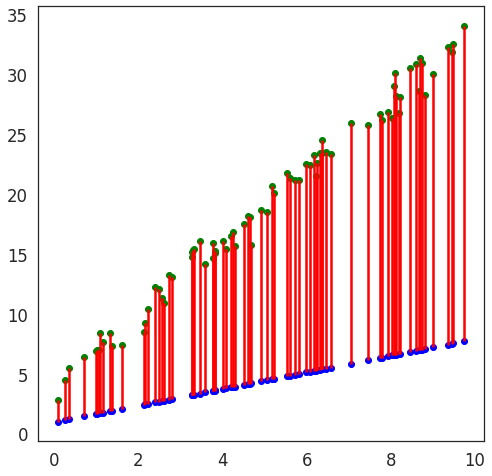

In [ ]:
w = np.random.rand(2,)

X, y = generate_data(100)

X_train, y_train, X_test, y_test = preprocess(X, y)
y_new = predict(X_train, w)
visualize_pointwise_loss(X_train, y_train, y_new)
#print(X_train[:,-1].shape,y_train.shape,'\n',y_new.shape)

# Optimization
To implement the optimization techniques of linear regression model.  
It is implemented in one of the two methods:
*   Normal Equation method: that sets the partial derivative of the loss function w.r.t weight vector to 0 and solve the resulting equation fo find the weight vector. 
*   Gradient Descent method: that iteratively adjusts the weight vector based on the learning rate and the gradient of the loss function at the current weight vector.
The steps to be followed are:
1.   Import Libraries
2.   Generate training data
3.  Preprocessing: Dummy feature addition and train test split
4.  Model Inference
5.  Loss Calculation
6.  Optimization




**Optimization using Normal Equation method**  
The weight vector is estimation by matrix multiplication of pseudo-inverse of feature matrix and the label vector.  
We make use of *np.linalg.pinv* for calculating pseudo-inverse of feature matrix.

In [ ]:
def normal_equation(X, y):
  ''' Estimate the parameters of linear regression model with normal quation.

      Args:
        X: feature meatrix of given inputs
        y: label vector

      Returns:
        Weight vector
  '''
  w1 = np.linalg.pinv(X) @ y
  return w1

In [ ]:
X, y = generate_data(100)
w = np.random.randn(2,)
#w_dummy = add_dummy_feature(w)
#y_dummy = add_dummy_feature(y_train)
X_train , y_train, X_test, y_test = preprocess(X, y)
print(X_train.shape, w.shape, y_train.shape)
#predicted_label = predict(X_train, w)
#print(y_train[:5], predicted_label[:5])
loss_value = loss(X_train, y_train, w)

(80, 2) (2,) (80,)


We test this function with the generated training set whose weight vector is known to us.


*   We setup the test with feature matrix, label vector and expected weight vectors.
*   Next we estimate the weight vector with Normal equation method
*   We test the shape and contetnts of the expected and estimated weight vectors



In [ ]:
import unittest

class TestNormalEquation(unittest.TestCase):
  def test_normal_equation(self):
    feature_matrix = X_train
    label_vector = y_train
    expected_weight_vector = np.array([4.,3.])
    estimated_weight_vector = normal_equation(feature_matrix,label_vector)

    self.assertEqual(estimated_weight_vector.shape, (2,))
    np.testing.assert_array_almost_equal(estimated_weight_vector,expected_weight_vector, decimal=0)

unittest.main(argv=[''],defaultTest="TestNormalEquation", verbosity=2, exit=False)

test_normal_equation (__main__.TestNormalEquation) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


## Gradient Descent

**Gradient Descent (GD)**
GD is implemented as follows:
* Randomly initialize **w** to **0**
* Iterate until convergence
  * Calculate partial derivative of loss w.r.t weight vector
  * Calculate new weight
  * Update weights to the new values simultaniously  

We use number of epochs as a convergence criteria in this implementation.

**Partial derivatives of loss function:**  
Let us implement a function to calculate partial derivative of loss function using the following equation
$Derivative(J(w)) = X^T (Xw - y)$   







In [ ]:
def calculate_gradient(X, y ,w):
  ''' Calculates gradient of loss function w.r.t weight vector on training set

      Args:
        X: feature matrix of shape (n,m+1)
        y: label vector of shape (n,)
        w: weight vector of shape (m+1,1)
      Returns:
        A vector of gradients
  '''
  gradient = np.transpose(X) @ (predict(X,w) - y)
  return gradient

**Example:**
X = [[1, 3, 2, 5],[1, 9, 4, 7]]
w = [1 1 1 1]
y = [6 11]
$gradient = X^T (Xw - y)$  
= [[1, 3, 2, 5],[1, 9, 4, 7]]T [[1, 3, 2, 5],[1, 9, 4, 7]] * [1, 1, 1, 1]    
= [15 105 50 95] (column vector)

In [ ]:
import unittest

class TestCalculateGradient(unittest.TestCase):
  def test_calculate_gradient(self):
    feature_matrix = np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11])
    expected_gradient = np.array([15, 105, 50, 95])

    predicted_gradient = calculate_gradient(feature_matrix, label_vector, weight_vector)

    self.assertEqual(predicted_gradient.shape, (4,))

    np.testing.assert_array_almost_equal(expected_gradient, predicted_gradient)

unittest.main(argv=[''],defaultTest="TestCalculateGradient", verbosity=2,exit=False)

test_calculate_gradient (__main__.TestCalculateGradient) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


**Weight updates:**
New weights are obtained from old weight by subtracting the gradient weighted by the learning rate.
$w_{new} = w_{old} - α * GD$


In [ ]:
def update_weights(w, grad, lr):
  ''' updates the weights based on the gradient of the loss function
      w_new = w_old - (lr * grad)
      Args:
        w: old weight vector
        grad: gradient of loss w.r.t w
        lr: learning rate
      Return:
        updated weight vector
  '''
  w_new = w - (lr * grad)
  return w_new

**Example:**
weight vector w = [1, 1, 1, 1]
gradient = [15, 105, 50, 95]
learning rate = 0.001

updated weight = w - lr*grad  
= [1 1 1 1] - 0.001 * [15 105 50 95]
= [0.985 0.895 0.95 0.905]

In [ ]:
# Test update_weights
import unittest

class TestUpdateWeights(unittest.TestCase):
  def test_update_weights(self):
    w = np.array([1,1,1,1])
    lr = 0.001
    grad = np.array([15, 105, 50, 95])
    expected_wnew = np.array([0.985, 0.895, 0.95, 0.905])

    predicted_wnew = update_weights(w, grad, lr)

    self.assertEquals(predicted_wnew.shape, (4,))

    np.testing.assert_array_almost_equal(expected_wnew, predicted_wnew)

unittest.main(argv=[''],defaultTest="TestUpdateWeights",verbosity=2, exit=False)

test_update_weights (__main__.TestUpdateWeights) ... /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Please use assertEqual instead.
  del sys.path[0]
ok

----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


**Gradient Descent Procedure:**


In [ ]:
def gradient_descent(X:np.ndarray, y:np.ndarray,lr:float, num_epochs:int):
  ''' Estimate parameters of linear regression model through gradient descent

      Args:
        X: Feature Matrix
        y: label vector
        lr: learning rate
        num_epochs: number of training steps
      
      Return:
      weight vector: final weight vector
      Error vector across all iterations
      weight vector across all iterations
  '''
  w_all = []    # weight vector across all iterations
  err_all = []  # error vector across all iterations

  # parameter vector initialized to zeroes
  w = np.zeros(X.shape[-1])

  # Gradient descent loop
  print()
  for i in np.arange(0, num_epochs):
    w_all.append(w)

    #calculate error due to the current weight vector using loss function
    err_all.append(loss(X, y,w))

    #gradient calculation
    dJdw = calculate_gradient(X, y, w)

    #Print status every 100 iterations
    if(i%100 == 0):
      print('Iteration #: %d, loss: %4.2f'%(i, err_all[-1]))
    
    #weight vector update
    w = update_weights(w,dJdw,lr)
  
  return w, err_all, w_all

Test the function using synthetic data set created

In [ ]:
import unittest

class TestGradientDescent(unittest.TestCase):
  def test_gradient_descent(self):
    feature_matrix = X_train
    label_vector = y_train
    expected_weights = np.array([4.,3.])

    w, error_all, w_all = gradient_descent(feature_matrix,label_vector,lr=0.0001,num_epochs=2000)

    self.assertEqual(w.shape, (2,))

    np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)

unittest.main(argv=[''],defaultTest="TestGradientDescent",verbosity=2, exit=False)

test_gradient_descent (__main__.TestGradientDescent) ... 


Iteration #: 0, loss: 15951.73
Iteration #: 100, loss: 111.32
Iteration #: 200, loss: 86.29
Iteration #: 300, loss: 70.50
Iteration #: 400, loss: 60.53
Iteration #: 500, loss: 54.24
Iteration #: 600, loss: 50.27
Iteration #: 700, loss: 47.76
Iteration #: 800, loss: 46.18
Iteration #: 900, loss: 45.18
Iteration #: 1000, loss: 44.55
Iteration #: 1100, loss: 44.15
Iteration #: 1200, loss: 43.90
Iteration #: 1300, loss: 43.75
Iteration #: 1400, loss: 43.65
Iteration #: 1500, loss: 43.58
Iteration #: 1600, loss: 43.54
Iteration #: 1700, loss: 43.52
Iteration #: 1800, loss: 43.50
Iteration #: 1900, loss: 43.49


ok

----------------------------------------------------------------------
Ran 1 test in 0.038s

OK


Since we store weights in each iteration, we can use it to plot intermediate models in order to understand the trajectory taken by GD.
*   err_all : loss values across all iterations
*   w_all : weight vectors across all iterations



In [ ]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.00001, num_epochs=200)


Iteration #: 0, loss: 19673.61
Iteration #: 100, loss: 3057.94


In [ ]:
#Plot model trajectory

X_b = np.c_[np.ones((X.shape[0],1)),X]
X_new = np.array([[0],[10]])
X_new_b = np.c_[np.ones((2,1)),X_new]
#print(X_b[:5],'\n',X_new,'\n',X_new_b)

for j in range(0, len(w_all)):
  if(j%10 !=0): continue
  y_hat = predict(X_new_b, w_all[j])
  style = 'b-' if j>0 else 'r--'
  plt.plot(X_new_b[:,1],y_hat,style)

plt.plot(X_train[:,1],y_train,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$x$",rotation=0,fontsize=18)
plt.title("Gradient Descent",fontsize=18)
plt.axis([0,10,0,40])
plt.show()

AssertionError: ignored

**Learning Curve:**

In [ ]:
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel("iteration #")
  plt.ylabel("Loss $J(\mathbf{w})$")


Iteration #: 0, loss: 19673.61
Iteration #: 100, loss: 3568.67
Iteration #: 200, loss: 3568.67
Iteration #: 300, loss: 3568.67
Iteration #: 400, loss: 3568.67
Iteration #: 500, loss: 3568.67
Iteration #: 600, loss: 3568.67
Iteration #: 700, loss: 3568.67
Iteration #: 800, loss: 3568.67
Iteration #: 900, loss: 3568.67
Iteration #: 1000, loss: 3568.67
Iteration #: 1100, loss: 3568.67
Iteration #: 1200, loss: 3568.67
Iteration #: 1300, loss: 3568.67
Iteration #: 1400, loss: 3568.67
Iteration #: 1500, loss: 3568.67
Iteration #: 1600, loss: 3568.67
Iteration #: 1700, loss: 3568.67
Iteration #: 1800, loss: 3568.67
Iteration #: 1900, loss: 3568.67


TypeError: ignored

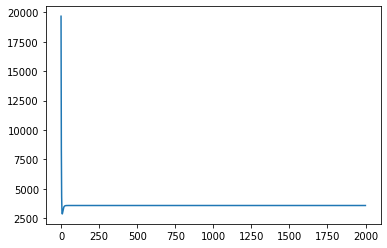

In [ ]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.000001, num_epochs=2000)
plot_learning_curves(err_all)


Iteration #: 0, loss: 15951.73
Iteration #: 100, loss: 111.32
Iteration #: 200, loss: 86.29
Iteration #: 300, loss: 70.50
Iteration #: 400, loss: 60.53
Iteration #: 500, loss: 54.24
Iteration #: 600, loss: 50.27
Iteration #: 700, loss: 47.76
Iteration #: 800, loss: 46.18
Iteration #: 900, loss: 45.18
Iteration #: 1000, loss: 44.55
Iteration #: 1100, loss: 44.15
Iteration #: 1200, loss: 43.90
Iteration #: 1300, loss: 43.75
Iteration #: 1400, loss: 43.65
Iteration #: 1500, loss: 43.58
Iteration #: 1600, loss: 43.54
Iteration #: 1700, loss: 43.52
Iteration #: 1800, loss: 43.50
Iteration #: 1900, loss: 43.49


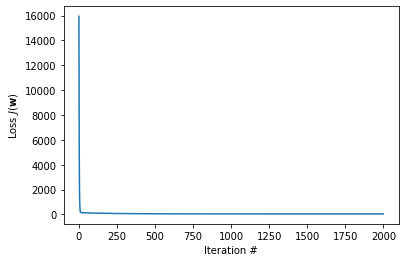

In [ ]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.0001, num_epochs=2000)
plot_learning_curves(err_all)


Iteration #: 0, loss: 15951.73
Iteration #: 100, loss: 642617986138636812851809809401458775902739600524628887406476249011335778743996394385101408571257419253600224002339952360670702406700575336367346033454901636890226485296341036056258765400876299538817895235805160996424251190622639204054992338695508794306835886404803808933649055744.00
Iteration #: 200, loss:  inf
Iteration #: 300, loss:  nan
Iteration #: 400, loss:  nan
Iteration #: 500, loss:  nan
Iteration #: 600, loss:  nan
Iteration #: 700, loss:  nan
Iteration #: 800, loss:  nan
Iteration #: 900, loss:  nan
Iteration #: 1000, loss:  nan
Iteration #: 1100, loss:  nan
Iteration #: 1200, loss:  nan
Iteration #: 1300, loss:  nan
Iteration #: 1400, loss:  nan
Iteration #: 1500, loss:  nan
Iteration #: 1600, loss:  nan
Iteration #: 1700, loss:  nan
Iteration #: 1800, loss:  nan
Iteration #: 1900, loss:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


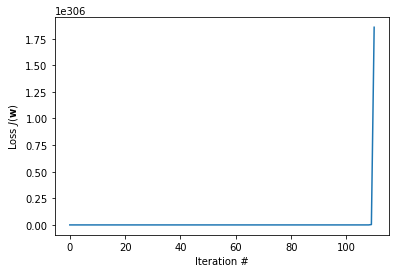

In [ ]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.01, num_epochs=2000)
plot_learning_curves(err_all)

## MiniBatch Gradient Descent (MGBGD)

To peform weight updates by computing gradient descent on batches of small number of examples.

In [ ]:
t0, t1 = 200, 100000
def learning_schedule(t):
  return (t0 / (t + t1))

In [ ]:
def mini_batch_gd(X:np.ndarray, y:np.ndarray, num_iters:int, minibatch_size:int):
  ''' Estimates paramaters of linear regression through mini batch gradient descent

      Args:
        X : feature matrix
        y : label vector
        num_iters : number of iterations
        minibatch_size : batch size
      
      Returns:
        weight vector
        error vector of all iterations
        weight vector of all iterations
  '''
  w_all = []  # weight vector of all iterations
  err_all = [] # loss vector of all iterations

  #weight vector(parameter vector) initialized to [0,0]
  w = np.zeros((X.shape[1]))
  t = 0

  for epoch in range(num_iters):
    shuffled_indices = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0,X.shape[0],minibatch_size):
      t += 1
      xi = X_shuffled[i:i+minibatch_size]
      yi = y_shuffled[i:i+minibatch_size]
      err_all.append(loss(xi, yi, w))

      gradients = 2/minibatch_size * calculate_gradient(xi, yi, w)
      lr = learning_schedule(t)
      w = update_weights(w, gradients,lr)
      w_all.append(w)

  return w, err_all, w_all

In [ ]:
# Test MBGD

import unittest

class TestMiniBatchGD(unittest.TestCase):
  def test_mini_batch_gd(self):
    feature_matrix = X_train
    label_vector = y_train
    expected_weights = np.array([4.,3.])

    w, error_all, w_all = mini_batch_gd(feature_matrix,label_vector,200,8)

    self.assertEqual(w.shape, (2,))

    np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)

unittest.main(argv=[''],defaultTest="TestMiniBatchGD",verbosity=2, exit=False)

test_mini_batch_gd (__main__.TestMiniBatchGD) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.039s

OK


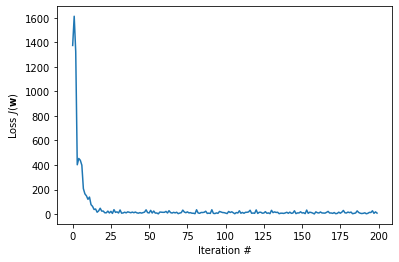

In [ ]:
w, err_all, w_all = mini_batch_gd(X_train, y_train, 20, 8)
plot_learning_curves(err_all)

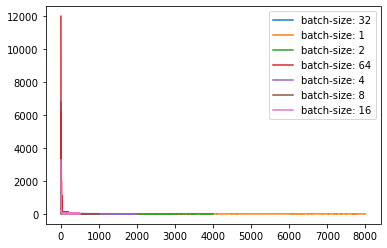

In [ ]:
batch_sizes = {1, 2, 4, 8, 16, 32, 64}
mbgd_status = {}

for batch_size in batch_sizes:
  w, err_all, w_all = mini_batch_gd(X_train, y_train,100, batch_size)
  mbgd_status[batch_size] = err_all
  legend = 'batch-size: %d'%batch_size
  plt.plot(err_all,label=legend)

plt.xlabel = 'iteration #'
plt.ylabel = 'Loss $J(w)$'
plt.legend() 

## Stochastic Gradient Descent (SGD)

The key idea here is to perform weight updates by computing gradient descent on one example at a time.  
In fact MBGD with number of examples per batch = 1.

In [ ]:
def sgd(X:np.ndarray, y:np.ndarray, num_epochs:int):
  ''' Estimates paramaters of linear regression through mini batch gradient descent

      Args:
        X : feature matrix
        y : label vector
        num_epochs : number of iterations
        
      Returns:
        weight vector
        error vector of all iterations
        weight vector of all iterations
  '''
  w_all = []  # weight vector of all iterations
  err_all = [] # loss vector of all iterations

  #weight vector(parameter vector) initialized to [0,0]
  w = np.zeros((X.shape[1]))

  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      err_all.append(loss(xi, yi, w))

      gradients = 2 * calculate_gradient(xi, yi, w)
      lr = learning_schedule(epoch * X.shape[0]+i)
      w = update_weights(w, gradients,lr)
      w_all.append(w)

  return w, err_all, w_all

In [ ]:
# Test SGD

import unittest

class TestStochasticGD(unittest.TestCase):
  def test_stochastic_gd(self):
    feature_matrix = X_train
    label_vector = y_train
    expected_weights = np.array([4.,3.])

    w, error_all, w_all = sgd(feature_matrix,label_vector,20)

    self.assertEqual(w.shape, (2,))

    np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)

unittest.main(argv=[''],defaultTest="TestStochasticGD",verbosity=2, exit=False)

test_stochastic_gd (__main__.TestStochasticGD) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.041s

OK


TypeError: ignored

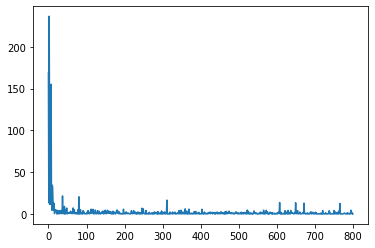

In [ ]:
w, err_all, w_all = sgd(X_train, y_train, 10)
plot_learning_curves(err_all)